# Applied Data Science
### Predict a call center activity


A call center contacted you because they have several mounths of call history. To better plan their activity, they would like to accurately predict the amount of call they should expect.

## The Data

The data they provide is gathered in the `data/CallCenter` directory. As you see you have one listing per day of the week. The data are formated as follows: 

- 1st line: start of the time period
- 2nd line: end of the time period
- then: number of calls received during the period for the given week (week index = 1st column)

## What do they want ?

You are hired to give them the probability distribution function of the number of call they expect every day. 
You should be able to parametrize it. Also, because they are not statisticien, they want a clear anwser of the `5-95%` and `18-64%` intervals for the number of call expected every half-hour for each day of the week.

# Good luck

***
# Correction

In [1]:
# ==  Basic import == #
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')
# plot within the notebook
%matplotlib inline

In [30]:
## 1 Read the files
import numpy as np

In [155]:
import pandas

In [158]:
p = pandas.read_csv("data/CallCenter/%ss.csv"%"Monday", sep=" ")

In [168]:
d_ = p.to_dict()

In [169]:
d_

{'10.0': {0: 10.5,
  1: nan,
  2: 17.0,
  3: 16.0,
  4: 14.0,
  5: 15.0,
  6: 20.0,
  7: 14.0,
  8: 12.0,
  9: 15.0,
  10: 11.0,
  11: 18.0,
  12: 15.0,
  13: 21.0,
  14: 16.0,
  15: 16.0,
  16: 15.0,
  17: 17.0,
  18: 20.0,
  19: 15.0,
  20: 16.0,
  21: 14.0,
  22: 14.0,
  23: 13.0,
  24: 9.0,
  25: 23.0,
  26: 14.0,
  27: 18.0,
  28: 11.0,
  29: 14.0,
  30: 12.0,
  31: 17.0,
  32: 11.0,
  33: 16.0,
  34: 17.0,
  35: 12.0,
  36: 15.0,
  37: 11.0,
  38: 13.0,
  39: 13.0,
  40: 10.0,
  41: 15.0,
  42: 11.0,
  43: 14.0,
  44: 19.0,
  45: 12.0,
  46: 9.0,
  47: 13.0,
  48: 15.0,
  49: 19.0,
  50: 17.0,
  51: 11.0,
  52: 11.0,
  53: 22.0,
  54: 10.0,
  55: 10.0,
  56: 15.0,
  57: 16.0,
  58: 17.0,
  59: 20.0,
  60: 10.0,
  61: 15.0,
  62: 13.0,
  63: 15.0,
  64: 12.0,
  65: 7.0,
  66: 14.0,
  67: 22.0,
  68: 15.0,
  69: 16.0,
  70: 13.0,
  71: 12.0,
  72: 7.0,
  73: 6.0,
  74: 16.0,
  75: 15.0,
  76: 20.0,
  77: 12.0,
  78: 17.0,
  79: 18.0,
  80: 9.0,
  81: 6.0,
  82: 17.0,
  83: 10.0,
  

In [31]:
dayoftheweek = ["Monday","Tuesday","Wednesday", "Thursday","Friday"]

In [139]:
def get_weekday_data(day):
    """ Read the call center file and returns an dictionary"""
    if day not in dayoftheweek:
        raise ValueError("%d is not a day or the week or has the wrong format. Week day: ",+ ", ".join(dayoftheweek))
    data =  [l[2:].split() for l in open("data/CallCenter/%ss.csv"%day).read().splitlines() if len(l.split())>4 and l[0] !="#"]
    return np.asarray(data[2:], dtype="float")

In [140]:
monday = get_weekday_data("Monday").T

In [141]:
import matplotlib.pyplot as mpl

(array([  3.,  17.,  13.,  24.,  10.,  22.,   9.,   1.,   0.,   1.]),
 array([  2. ,   3.6,   5.2,   6.8,   8.4,  10. ,  11.6,  13.2,  14.8,
         16.4,  18. ]),
 <a list of 1 Patch objects>)

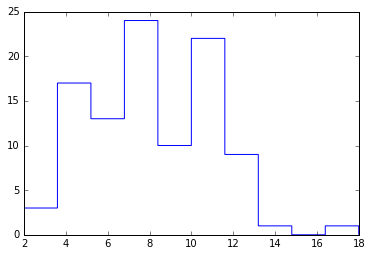

In [144]:
mpl.hist(monday[0], histtype="step")

ERROR: TypeError: _parse_args() takes at least 2 arguments (1 given) [scipy.stats._distn_infrastructure]
ERROR:astropy:TypeError: _parse_args() takes at least 2 arguments (1 given)


TypeError: _parse_args() takes at least 2 arguments (1 given)

In [147]:
from scipy import stats

In [148]:
p = stats.poisson(4)

In [153]:
x = np.linspace(0,10,11)
print x

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


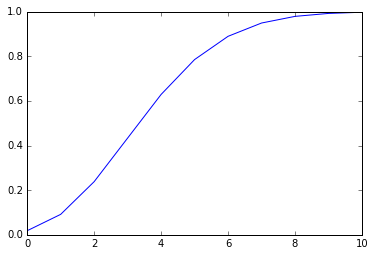

In [154]:
mpl.plot(x, p.cdf(x))